# Assignment 3

## I use my own class from previous assignment

In [0]:
class Graph():
  def __init__(self):
    '''Function creates graph object.'''
    self.vertices = dict()
    self.edges = []

  def addVertex(self,vert):
    '''Function adds vertex to the graph object.
    
    Keyword arguments:
    vert -- vertex label
    '''
    if vert not in self.vertices.keys():
        self.vertices[vert] = []
    else:
      print("Node exist in the graph!")

  def getVertices(self):
    '''Function return list of vertices.'''
    return self.vertices.keys()

  def addVerticesFromList(self,vertList):
    '''Function adds all vertices from list to the graph object.
    
    Keyword arguments:
    vertList -- list of vertices
    '''
    if type(vertList)!=list:
      print('Argument must be type list')
      pass
    
    for vertex in vertList:
      self.addVertex(vertex)

  def addEdge(self,vert1,vert2,*weight):
    '''Function adds weighted edge between vertices in the graph 
    object. Add new vertices to vertices list. 
    
    Keyword arguments:
    vert1 -- first vertex label
    vert2 -- second vertex label
    *weight -- weight of edge
    '''
    if (vert1,vert2,*weight) in self.edges:
      #print ("Edge exists in the graph")
      pass
    if (vert2,vert1,*weight) in self.edges:
      #print ("Edge exists in the graph")
      pass

    if vert1 not in self.vertices:
      self.vertices[vert1]=[vert2]
    else:
      self.vertices[vert1].append(vert2)

    if vert2 not in self.vertices:
      self.vertices[vert2]=[vert1]
    else:
      self.vertices[vert2].append(vert1)
    
    self.edges.append((vert1,vert2,*weight))

  def getEdges(self):
    '''Function returs list of edges in the graph.'''
    return self.edges

  def addEdgesFromList(self,edgeList):
    '''Function adds edges from the list to the graph.

    Keyword arguments:
    edgeList -- list of edges, elements are tuples
    '''
    if type(edgeList)!=list:
      print("Argument must be type list")
      pass

    for element in edgeList:
      if type(element)!=tuple:
        print("List must contain elements type tuple")
        pass
        
    for edge in edgeList:
      if len(edge)==3:
        self.addEdge(edge[0],edge[1],edge[2])
      elif len(edge)==2:
        self.addEdge(edge[0],edge[1])

  def getNeighbors(self,vertKey):
    '''Function returns the list of neighbors of vertex
    from function argument.

    Keyword arguments:
    vertKey -- label of vertex
    '''
    return self.vertices[vertKey]

  def __contains__(self,vert):
    '''Function returns True if vertex from argument is in the graph
    or False otherwise.

    Keyword arguments:
    vert -- label of vertex
    '''
    if vert in self.vertices:
      return True
    else:
      return False
  

  def saveGraph(self,graph):
    '''Function creates text file with graph in dot language.

    Keyword arguments:
    graph -- name of file
    '''
    seperator = ''
    graphviz_dot_file = open(seperator.join((graph,".txt")),"w") 
    graphviz_dot_file.write("graph G0 { \n")
    for element in self.edges:
      graphviz_dot_file.write(seperator.join((str(element[0]),'--',str(element[1]),'\n')))
    graphviz_dot_file.write("}")
    graphviz_dot_file.close()

  def getShortestPaths(self,fromVert):
    '''Function creates dictionary  shortest paths in the graph 
    from the given vertex to all other vertices.

    Keyword arguments:
    fromVert -- label of start vertex
    '''
    neighbors_dict = dict()
    path = 1
    neighbors = self.getNeighbors(fromVert)
    for node in neighbors:
      neighbors_dict[node] = path
    while True:
      neighbors_neighbors = []    # list of neighbors of neighbors
      for node in neighbors:
        neighbors = self.getNeighbors(node)
        for element in neighbors:
          neighbors_neighbors.append(element)
      new_neighbor = 0  # counter on new nodes in step in loop
      path += 1   # length of path in this step
      for element in neighbors_neighbors:
        if element not in neighbors_dict:
          if element != fromVert:   
            neighbors_dict[element] = path
            new_neighbor += 1
      if new_neighbor == 0:
        break     # break if there is no new path
      neighbors = neighbors_neighbors
    return neighbors_dict

##**Exercise 1**

In [0]:
import itertools
import random as rn
import numpy as np
from scipy.special import binom 
from math import factorial 
from scipy.stats import poisson 
import matplotlib.pyplot as plt
import math
from statsmodels.distributions.empirical_distribution import ECDF
import statistics
import csv
import urllib
import networkx as nx

##Random Graph

In [0]:
def RandomGraph(N,p):
  ''' Function creates random graph with N nodes and probability of connection p'''
  random_graph = Graph()
  random_graph.addVerticesFromList(list(range(N)))
  # adding edge with probability p for all possible pairs of vertices
  for pair in list(itertools.combinations(list(range(N)), 2)):   
    if p>rn.random():
      random_graph.addEdge(pair[0],pair[1])
  return random_graph

In [0]:
rg1 = RandomGraph(800,.2)
rg2 = RandomGraph(500,.5)
rg3 = RandomGraph(100,.95)

## Number of vertices

In [38]:
print(len(rg1.getVertices()))
print(len(rg2.getVertices()))
print(len(rg3.getVertices()))

800
500
100


##Number of edges

In [39]:
print(len(rg1.getEdges()))
print(len(rg2.getEdges()))
print(len(rg3.getEdges()))

64041
62431
4671


##Average degree

In [40]:
print(len(rg1.getEdges())/len(list(rg1.getVertices())))
print(len(rg2.getEdges())/len(list(rg2.getVertices())))
print(len(rg3.getEdges())/len(list(rg3.getVertices())))

80.05125
124.862
46.71


##Variance of degree distribution

In [41]:
dist_rg1 = []
dist_rg2 = []
dist_rg3 = []
for node in list(rg1.getVertices()):
  dist_rg1.append(len(rg1.getNeighbors(node)))

for node in list(rg2.getVertices()):
  dist_rg2.append(len(rg2.getNeighbors(node)))

for node in list(rg3.getVertices()):
  dist_rg3.append(len(rg3.getNeighbors(node)))

print(statistics.variance(dist_rg1))
print(statistics.variance(dist_rg2))
print(statistics.variance(dist_rg3))

122.60024405506883
130.95773947895793
5.074343434343434


| p |  vertices | edges | av deg | variance|
|------|------|------|------|------|
|   0.2  | 800| 64041|80 |123 |
|0.5|500|62431|125|131|
|0.95|100|4671|47|5|

##Frequency plot

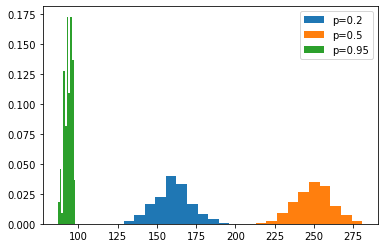

In [42]:
plt.hist(dist_rg1,label='p=0.2', density=True)
plt.hist(dist_rg2,label='p=0.5', density=True)
plt.hist(dist_rg3,label='p=0.95', density=True)
plt.legend()

##Fit a model distribution (Poisson and Binomial)

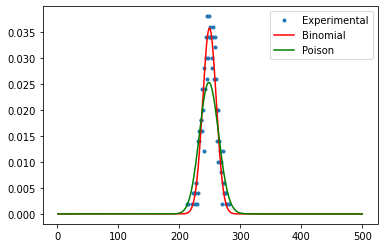

In [45]:
#method from lecture
#random graph 1
sample = dist_rg2
p=.5
N = 500
unique, counts = np.unique(sample, return_counts=True) 
deg = dict(zip(unique, counts))
keys = sorted(deg.keys()) 
vals = [] 
for k in keys:
  vals.append(deg[k]/len(sample)) 
plt.plot(keys,vals,'.',label='Experimental') 

kaver = int(p*(N-1)) 
kvals1 = np.arange(1,N+1) 
pk1 = np.zeros(N,dtype=float) 
for k in kvals1:
  pk1[k-1] = binom(N-1,k)*(p**k)*(1-p)**(N-1-k)
plt.plot(kvals1,pk1,'r',label='Binomial')

poi1 = np.zeros(N,dtype=float)
i = 0 
for k in kvals1:
  poi1[i] = poisson.pmf(k,kaver)
  i = i+1

plt.plot(kvals1,poi1,'g',label='Poison')
plt.legend()

#Watts-Strogats model

In [0]:
def WSModelGraph(N,p,K):
  '''Function creates Watts-Strogats model graph with N nodes, connected with prbability p. Initialized circle graph has degree K'''

  # creating edges between vertices in ring of nodes
  edges = [] 
  for i in range(N):
    for j in range(1,int(K/2)+1):
      if i+j<N:
        edges.append((i,i+j))
      else:
        edges.append((i,i+j-N))

  #choosing random edge from node1
  for node1 in range(N):
    for edge in [link for link in edges if node1 in link]:
      if p>rn.random():
        #choosing random node that is not connected with node1
        new_node = rn.choice([vert for vert in list(range(N))])
        while new_node == node1:
          new_node = rn.choice([vert for vert in list(range(N))])
        #new edge is added and the previous one is removed
        if (node1,new_node) and(new_node,node1) not in edges:
          edges.append((node1,new_node))
          edges.remove(edge)
  
  WSmodel_graph = Graph()
  WSmodel_graph.addVerticesFromList(list(range(N)))
  WSmodel_graph.addEdgesFromList(edges)
  return WSmodel_graph 

In [0]:
K1=2
K2=20
N=2000
ws_model_graph1 = WSModelGraph(N,.4,K1)
ws_model_graph2 = WSModelGraph(N,.4,K2)
ws_model_graph3 = WSModelGraph(N,.9,K1)
ws_model_graph4 = WSModelGraph(N,.9,K2)

##Number of edges

In [49]:
print(len(ws_model_graph1.getEdges()))
print(len(ws_model_graph2.getEdges()))
print(len(ws_model_graph3.getEdges()))
print(len(ws_model_graph4.getEdges()))

2000
20000
2000
20000


##Number of vertices

In [50]:
print(len(ws_model_graph1.getVertices()))
print(len(ws_model_graph2.getVertices()))
print(len(ws_model_graph3.getVertices()))
print(len(ws_model_graph4.getVertices()))

2000
2000
2000
2000


##Average degree

In [51]:
print(len(ws_model_graph1.getEdges())/len(list(ws_model_graph1.getVertices())))
print(len(ws_model_graph2.getEdges())/len(list(ws_model_graph2.getVertices())))
print(len(ws_model_graph3.getEdges())/len(list(ws_model_graph3.getVertices())))
print(len(ws_model_graph4.getEdges())/len(list(ws_model_graph4.getVertices())))

1.0
10.0
1.0
10.0


##Variance of distribution

In [52]:
dist_ws1 = []
dist_ws2 = []
dist_ws3 = []
dist_ws4 = []
for node in list(ws_model_graph1.getVertices()):
  dist_ws1.append(len(ws_model_graph1.getNeighbors(node)))

for node in list(ws_model_graph2.getVertices()):
  dist_ws2.append(len(ws_model_graph2.getNeighbors(node)))

for node in list(ws_model_graph3.getVertices()):
  dist_ws3.append(len(ws_model_graph3.getNeighbors(node)))

for node in list(ws_model_graph4.getVertices()):
  dist_ws4.append(len(ws_model_graph4.getNeighbors(node)))

print(statistics.variance(dist_ws1))
print(statistics.variance(dist_ws2))
print(statistics.variance(dist_ws3))
print(statistics.variance(dist_ws4))

1.2296148074037019
12.581290645322662
1.7978989494747373
23.094547273636817


| p | K| vertices | edges | av deg | variance|
|------|------|------|------|------|------|
|0.4 | 2| 2000|2000 |1 |1.23|
|0.4| 20|2000|20000|10|12.58|
|0.9|2|2000|2000|1|1.8|
|0.9|20|2000|20000|10|23.1|

##Frequency plot

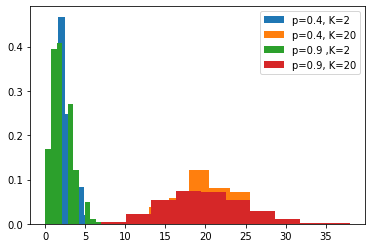

In [53]:
plt.hist(dist_ws1,label='p=0.4, K=2', density=True)
plt.hist(dist_ws2,label='p=0.4, K=20', density=True)
plt.hist(dist_ws3,label='p=0.9 ,K=2', density=True)
plt.hist(dist_ws4,label='p=0.9, K=20', density=True)
plt.legend()

##Fit a model distribution

For $p = 1$ it is Poisson distribution. So I compare Poisson distribution for $p = 0.9$.

There is general formula from lecture for Watts-Strogatz model:  
$$ p_k = \sum_{n=0}^{f(k,K)} C_{K/2}^n (1-p)^n p^{K/2-n}\frac{(pK/2)^{k-n-K/2}}{(k-n-K/2)!}e^{-pK/2}
$$

where:



*   $K -$ degre at $p = 0$
*   $f(k,K) = \text{min}(k-K/2,K/2)$
*   $C_{K/2}^n$ - number of n-combinations from a set of $K/2$ elements

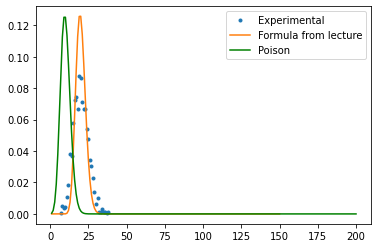

In [65]:
sample = dist_ws4

unique, counts = np.unique(sample, return_counts=True) 
deg = dict(zip(unique, counts))
keys = sorted(deg.keys()) 
vals = [] 
for k in keys:
  vals.append(deg[k]/len(sample)) 

plt.plot(keys,vals,'.',label='Experimental') 

p=.9
K=20
kaver = int(p*(150-1)) 
kvals1 = np.arange(1,150+1) 
pk1 = np.zeros(150,dtype=float) 
for k in kvals1:
  suma = 0
  for n in range(int(min(k-K/2,K/2))+1):
    suma += binom(K/2,n)*((1-p)**n)*(p**(K/2-n))*np.exp(-p*K/2)*((p*K/2)**(k-(K/2)-n)/math.factorial(k-(K/2)-n))
  pk1[k-1] = suma

plt.plot(kvals1,pk1, label='Formula from lecture')

kaver = len(ws_model_graph4.getEdges())/len(list(ws_model_graph4.getVertices()))
kvals1 = np.arange(1,200+1) 
poi1 = np.zeros(200,dtype=float)
i = 0 
for k in kvals1:
  poi1[i] = poisson.pmf(k,kaver)
  i = i+1

plt.plot(kvals1,poi1,'g',label='Poison')
plt.legend()

##Barabasi-Albert model

In [0]:
def BAModelGraph(N,m0=3,M=2):
  '''Function creates Barabasi-Albert model graph with N nodes, graph started with m0 nodes linked togethe. Every next node has M links, M >= m0'''

  if M>m0:
    print('M must be smaller or equal m0')

  #m0 nodes linked together
  edges = [(m0-1,0)]
  for i in range(m0-2):
    edges.append((i,i+1))
      
  BA_model_graph = Graph()
  BA_model_graph.addEdgesFromList(edges)

  for node1 in range(m0,N):
    m=0
    # adding M links to node1 to random nodes with probaility len(BA_model_graph.getNeighbors(node2[0]))/len(BA_model_graph.getEdges())
    while m<M:
      node2 = rn.choices(range(node1),k=1)
      if len(BA_model_graph.getNeighbors(node2[0]))/len(BA_model_graph.getEdges())>rn.random():
        BA_model_graph.addEdge(node1,node2[0])
        m+=1


  return BA_model_graph

In [0]:
N = 2000
BA1 = BAModelGraph(N,2)
BA2 = BAModelGraph(N,6,4)
BA3 = BAModelGraph(N,10)

##Number of edges

In [76]:
print(len(BA1.getEdges()))
print(len(BA2.getEdges()))
print(len(BA3.getEdges()))

3997
7981
3989


##Number of vertices

In [77]:
print(len(BA1.getVertices()))
print(len(BA2.getVertices()))
print(len(BA3.getVertices()))

2000
2000
2000


##Average degree

In [78]:
print(len(BA1.getEdges())/len(list(BA1.getVertices())))
print(len(BA2.getEdges())/len(list(BA2.getVertices())))
print(len(BA3.getEdges())/len(list(BA3.getVertices())))

1.9985
3.9905
1.9945


##Variance of distribution

In [79]:
dist_ba1 = []
dist_ba2 = []
dist_ba3 = []

for node in list(BA1.getVertices()):
  dist_ba1.append(len(BA1.getNeighbors(node)))

for node in list(BA2.getVertices()):
  dist_ba2.append(len(BA2.getNeighbors(node)))

for node in list(BA3.getVertices()):
  dist_ba3.append(len(BA3.getNeighbors(node)))

print(statistics.variance(dist_ba1))
print(statistics.variance(dist_ba2))
print(statistics.variance(dist_ba3))

38.206094047023505
112.68398099049526
28.97936868434217


| m0 |  m|vertices | edges | av deg | variance|
|------|------|------|------|------|------|
|2|2 |2000 |3997 |2 |38.2|
|6|4|2000|7981|4|112.7|
|10|2|2000|3989|2|29|

##Frequency plot

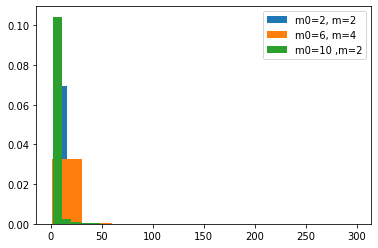

In [81]:
plt.hist(dist_ba1,label='m0=2, m=2', density=True)
plt.hist(dist_ba2,label='m0=6, m=4', density=True)
plt.hist(dist_ba3,label='m0=10 ,m=2', density=True)
plt.legend()

##Fit a model distribution

I fit two curves to the data:


*   $p_k^1 = e^{-<k>}\frac{<k>^k}{\sqrt{2\Pi k}}\frac{k}{e}^{-k}$
*   $p_k^2 = k^{-3}$




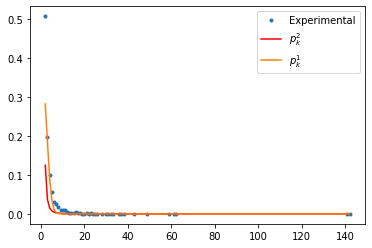

In [88]:
sample = dist_ba1
unique, counts = np.unique(sample, return_counts=True) 
deg = dict(zip(unique, counts))
keys = sorted(deg.keys()) 
vals = [] 
for k in keys:
  vals.append(deg[k]/len(sample)) 
plt.plot(keys,vals,'.',label='Experimental')

avk = len(BA1.getEdges())/len(list(BA1.getVertices()))
pk2 = np.zeros(len(keys),dtype=float)
pk1 = np.zeros(len(keys),dtype=float)
i = 0 
for k in keys:
  pk2[i] = (1/k)**(3)
  pk1[i] = np.exp(-avk)*((avk**k)/(np.sqrt(2*math.pi*k)*(k/np.exp(1))**k))
  i = i+1

plt.plot(keys,pk2,'r',label='$p_k^2$')
plt.plot(keys,pk1,label='$p_k^1$')
plt.legend()

##Power law

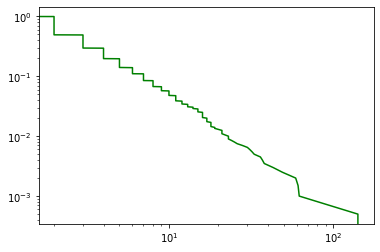

In [83]:
ecdf = ECDF(sample)
plt.plot(ecdf.x,1-ecdf.y,'g')

pk2 = np.zeros(len(keys),dtype=float)
i = 0
for k in keys:
  pk2[i] = (1/k)**(2)
  i = i+1

plt.yscale('log')
plt.xscale('log')

##**Exercise 2**

##Importing data

In [0]:
link = 'http://www.livejournal.com/misc/fdata.bml?user='
start_node = 'valerois'

response = urllib.request.urlopen(link+start_node)

In [0]:
data = response.readlines()

This time I use graph from networkx because of build in function to count degree centrality.

In [0]:
G = nx.Graph()

I define function to finding friends of a node in data.

In [0]:
def LoadingFriends(start_node,graph):
  '''Function add to the graph links from start_node'''
  link = 'http://www.livejournal.com/misc/fdata.bml?user='
  response = urllib.request.urlopen(link+start_node)
  data = response.readlines()
  for line in data[1:]:
    node = line[2:-1].decode("utf-8")
    if (node,start_node) and (start_node,node) not in graph.edges():
      graph.add_edge(node,start_node)
      response = urllib.request.urlopen(link+node)
      data1 = response.readlines()
      for line in data1[1:]:
        node2 = line[2:-1].decode("utf-8")
        if (node,node2) and (node2,node) not in graph.edges():
          graph.add_edge(node,node2)
  return graph

In [0]:
G = LoadingFriends(start_node,G)

This is my way to save graph as csv file

In [0]:
def SaveGraph(file_name, graph):
  '''Function save links in graph as csv file
  
  Keyword arguments:
  file_name -- name of csv file as string
  graph -- object graph
  '''
  separator = ''
  with open(separator .join((file_name,".csv")), mode='w') as graph_file:
    graph_writer = csv.writer(graph_file, delimiter=',', quotechar='"', lineterminator="\n", quoting=csv.QUOTE_MINIMAL)
    #saving links as a row
    for pair in graph.edges():
      graph_writer.writerow([pair[0],pair[1]])

In [0]:
SaveGraph('graph_file', G)

In [0]:
graph = nx.Graph()
with open('graph_file.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
      graph.add_edge(row[0],row[1])

##Number of nodes

In [18]:
graph.number_of_nodes()

131147

##Number of edges

In [19]:
graph.number_of_edges()

310310

##Celebrities

In [26]:
celebrities = nx.degree_centrality(graph)
sort_cel = sorted([(value,key) for (key,value) in celebrities.items()], reverse=True)
print(sort_cel[:10])

[(0.03496103579217056, 'borisakunin'), (0.03472465801473167, 'alexpashkov'), (0.03464078202918885, 'trirub'), (0.033863022890518964, 'lara_x'), (0.033611394933890475, 'no_globalism'), (0.03313863937901271, 'gogol'), (0.03273450963048816, 'morena_morana'), (0.03236850532993763, 'goodspider'), (0.03159074619126775, 'timgud'), (0.030713860887865433, 'das_foland')]


##Degree distribution

Text(0, 0.5, 'degree distribution')

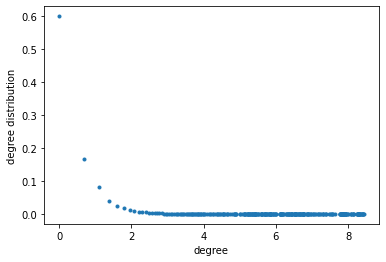

In [29]:
sample = []
for node in list(graph.nodes()):
  sample.append(graph.degree(node))

unique, counts = np.unique(sample, return_counts=True) 
deg = dict(zip(unique, counts))
keys = sorted(deg.keys()) 
vals = [] 
for k in keys:
  vals.append(deg[k]/len(sample)) 
plt.plot(np.log(keys),vals,'.')

plt.xlabel('degree') 
plt.ylabel('degree distribution') 